In [1]:
from sklearn.datasets import load_digits
import pandas as pd

digits = load_digits()
X = digits.data        # already flattened (n_samples, 64)
y = digits.target


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.decomposition import PCA

components = [2, 10, 30, 50]
pca_models = {}
explained_variance = {}

for n in components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    pca_models[n] = X_pca
    explained_variance[n] = pca.explained_variance_ratio_.sum()


In [4]:
variance_df = pd.DataFrame({
    "Components": components,
    "Explained Variance": [explained_variance[c] for c in components]
})

variance_df


,Components,Explained Variance
0,2,0.215950
1,10,0.588738
2,30,0.893208
3,50,0.982759


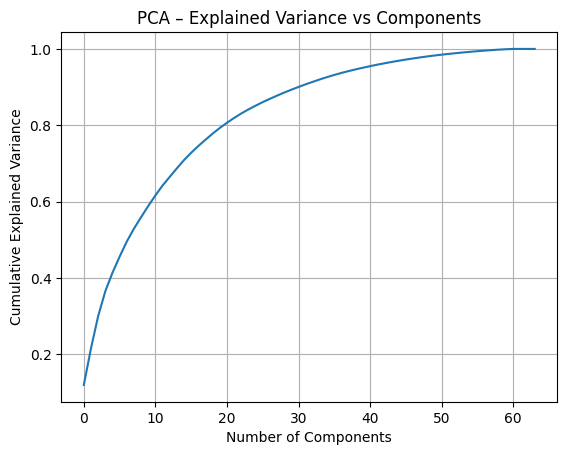

In [5]:
import matplotlib.pyplot as plt

pca_full = PCA().fit(X_scaled)

plt.plot(pca_full.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Explained Variance vs Components")
plt.grid()
plt.savefig("explained_variance_plot.png")  # 👈 REQUIRED
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)

original_acc = accuracy_score(y_test, lr.predict(X_test))


In [8]:
X_pca_30 = pca_models[30]

Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    X_pca_30, y, test_size=0.2, random_state=42
)

lr.fit(Xp_train, yp_train)
pca_acc = accuracy_score(yp_test, lr.predict(Xp_test))


In [9]:
print("Accuracy on Original Data:", original_acc)
print("Accuracy on PCA Reduced Data:", pca_acc)


Accuracy on Original Data: 0.9722222222222222
Accuracy on PCA Reduced Data: 0.9611111111111111


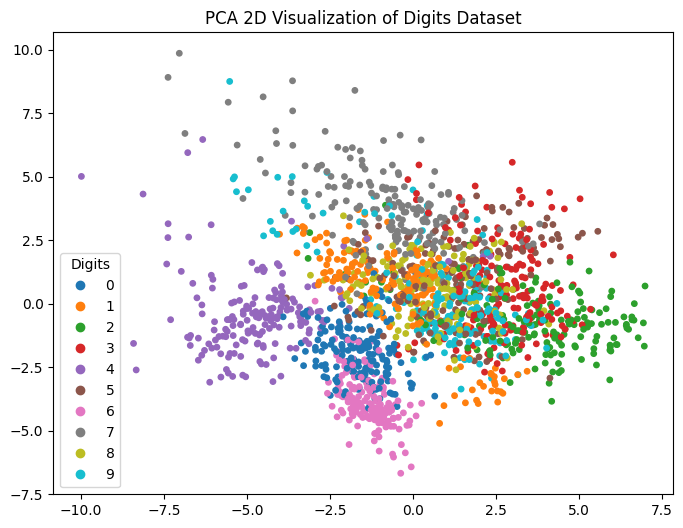

In [10]:
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap="tab10", s=15)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("PCA 2D Visualization of Digits Dataset")
plt.savefig("pca_2d_scatter.png")  # 👈 REQUIRED
plt.show()
